<a href="https://colab.research.google.com/github/sharuf-baig/test/blob/master/Traffic_Sign_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#!ls "/content/gdrive/My Drive"
!unzip -q "/content/gdrive/My Drive/myData.zip"

In [0]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator #for generating multiple image from the same images
from keras.utils.np_utils import to_categorical #for one hot encoding of data
from keras.models import Sequential
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense
from keras.optimizers import Adam
import pickle

In [38]:
path="/content/myData"
mylist =os.listdir(path)
print(len(mylist))

43


In [0]:
no_of_Classes = len(mylist)
images = []
classId = []

In [40]:
for i in range (0,no_of_Classes):
  p_Path = os.listdir(path+'/'+str(i))
  for j in p_Path:
    img = cv2.imread(path+'/'+str(i)+'/'+str(j))
    img = cv2.resize(img,(32,32))
    images.append(img)
    classId.append(i)
  print(i,end=" ") 
print(len(images)) 
print(classId) 

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 34799
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [41]:
images = np.array(images)
classId = np.array(classId)
print(images.shape)
print(classId.shape)
print(classId)

(34799, 32, 32, 3)
(34799,)
[ 0  0  0 ... 42 42 42]


In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(images,classId,test_size=0.2)
print(x_train.shape)
print(x_test.shape)

(27839, 32, 32, 3)
(6960, 32, 32, 3)


In [43]:
x_train,x_validation,y_train,y_validation = train_test_split(x_train,y_train,test_size=0.2)
print(x_train.shape)
print(y_train.shape)

(22271, 32, 32, 3)
(22271,)


In [44]:
no_of_images=[]
for i in range (0,no_of_Classes):
  no_of_images.append(len(np.where(y_train==i)[0]))
print(no_of_images)  

[110, 1295, 1245, 795, 1104, 1037, 227, 821, 802, 822, 1173, 774, 1188, 1209, 465, 356, 227, 637, 712, 111, 196, 170, 221, 292, 153, 867, 357, 140, 328, 146, 253, 426, 139, 373, 239, 698, 216, 105, 1177, 175, 215, 140, 135]


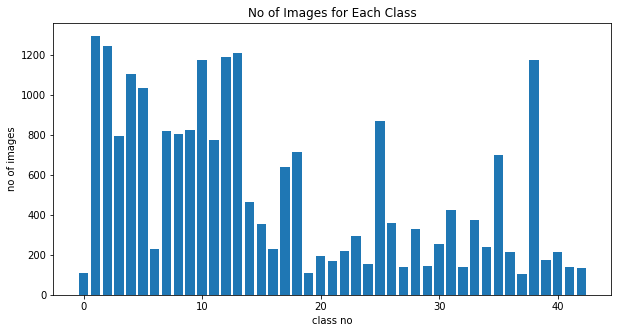

In [45]:
plt.figure(figsize=(10,5))
plt.bar(np.arange(0,no_of_Classes,1),no_of_images)
plt.title("No of Images for Each Class")
plt.xlabel('class no')
plt.ylabel('no of images')
plt.show()

In [0]:
def Preprocessing(im):
  im=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)#converting color image into grey scale
  im=cv2.equalizeHist(im)#equalizing the image for equal luminance
  im=im/255 #normalizing the image
  return im


In [0]:
x_train=np.array(list(map(Preprocessing,x_train)))
x_test=np.array(list(map(Preprocessing,x_test)))
x_validation=np.array(list(map(Preprocessing,x_validation)))

In [48]:
print(x_train.shape,x_test.shape,x_validation.shape)

(22271, 32, 32) (6960, 32, 32) (5568, 32, 32)


In [0]:
#adding depth 1 in training images for cnn\
x_train =np.reshape(x_train,(x_train.shape[0],x_train.shape[1],x_train.shape[2],1))
x_test =np.reshape(x_test,(x_test.shape[0],x_test.shape[1],x_test.shape[2],1))
x_validation =np.reshape(x_validation,(x_validation.shape[0],x_validation.shape[1],x_validation.shape[2],1))

In [50]:
print(x_train.shape)

(22271, 32, 32, 1)


In [0]:
img_gen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    rotation_range=0.2,
    shear_range=0.1
);
img_gen.fit(x_train)

In [0]:
#One Hot Encoding the classes
y_train = to_categorical(y_train,no_of_Classes)
y_test = to_categorical(y_test,no_of_Classes)
y_validation = to_categorical(y_validation,no_of_Classes)

In [0]:
def tModel():
  no_of_Filters=60
  size_of_Filter1=(5,5)
  size_of_Filter2=(3,3)
  size_of_Pool=(2,2)
  no_of_Nodes =500
  model = Sequential()
  model.add((Conv2D(no_of_Filters,size_of_Filter1,input_shape=(32,32,1),activation='relu')))
  model.add((Conv2D(no_of_Filters,size_of_Filter1,activation='relu')))
  model.add((MaxPooling2D(size_of_Pool)))
  model.add((Conv2D(no_of_Filters//2,size_of_Filter2,input_shape=(32,32,1),activation='relu')))
  model.add((Conv2D(no_of_Filters//2,size_of_Filter2,activation='relu')))
  model.add((MaxPooling2D(size_of_Pool)))
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(no_of_Nodes,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(no_of_Classes,activation='softmax'))
  model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
  return model


In [54]:
model =tModel()
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 4, 30)         

In [55]:
trained=model.fit_generator(img_gen.flow(x_train,y_train,batch_size=50),steps_per_epoch=2000,epochs=10,validation_data=(x_validation,y_validation),shuffle=1)

Epoch 1/10
2000/2000 [==============================] - 36s 18ms/step - loss: 1.0865 - acc: 0.6789 - val_loss: 0.1129 - val_acc: 0.9682
Epoch 2/10
2000/2000 [==============================] - 35s 18ms/step - loss: 0.3000 - acc: 0.9059 - val_loss: 0.0456 - val_acc: 0.9846
Epoch 3/10
2000/2000 [==============================] - 35s 18ms/step - loss: 0.1986 - acc: 0.9377 - val_loss: 0.0302 - val_acc: 0.9910
Epoch 4/10
2000/2000 [==============================] - 35s 17ms/step - loss: 0.1564 - acc: 0.9520 - val_loss: 0.0260 - val_acc: 0.9901
Epoch 5/10
2000/2000 [==============================] - 35s 17ms/step - loss: 0.1348 - acc: 0.9581 - val_loss: 0.0282 - val_acc: 0.9916
Epoch 6/10
2000/2000 [==============================] - 34s 17ms/step - loss: 0.1184 - acc: 0.9640 - val_loss: 0.0186 - val_acc: 0.9946
Epoch 7/10
2000/2000 [==============================] - 34s 17ms/step - loss: 0.1086 - acc: 0.9676 - val_loss: 0.0201 - val_acc: 0.9932
Epoch 8/10
2000/2000 [==========================

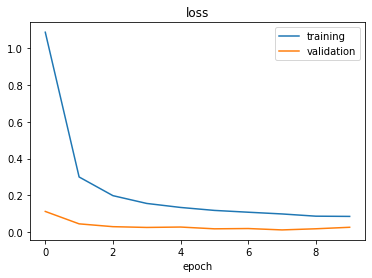

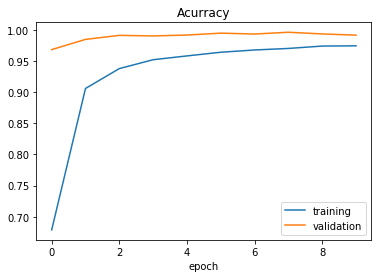

Test Score: 0.021526235751979973
Test Accuracy: 0.9939655172413793


In [56]:
plt.figure(1)
plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(trained.history['acc'])
plt.plot(trained.history['val_acc'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()
score =model.evaluate(x_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])


In [0]:
pickle_out= open("model_trained_20.p","wb") 
pickle.dump(model,pickle_out)
pickle_out.close()